## Packges and configurations ##

In [270]:
# Padrão
import pandas as pd 
import numpy as np 

# Light GBM
import lightgbm as lgb

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly
import seaborn as sns
sns.set_style('darkgrid')

# Others
from tqdm.autonotebook import tqdm
import openpyxl
import xlrd
import os
import statistics
from math import isnan

# Metrics from Sklearn
from sklearn import set_config
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             precision_score, 
                             recall_score, 
                             confusion_matrix, 
                             auc,
                             roc_curve, 
                             roc_auc_score, 
                             f1_score, 
                             auc)
from sklearn.pipeline import make_pipeline

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

# LOFO
from lofo import LOFOImportance, Dataset, plot_importance


In [271]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = FutureWarning) 
warnings.filterwarnings("ignore", category = UserWarning) 

In [272]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [273]:
path_in = '~\\Documents\\PRJ_OTIM_PRICING\\PriceOptimization\\data\\processed\\'
#path_out = '~\\Documents\\PRJ_OTIM_PRICING\\PriceOptimization\\data\\processed\\'

## Import dataframe ##

In [274]:
name_file_df = 'dataframe_processed_03.csv'
file_in = os.path.join(path_in, name_file_df)
df_risk = pd.read_csv(file_in, sep=",", encoding='UTF-8', low_memory=False)
df_risk.shape

(504550, 36)

## EDA Dataframe ##

In [275]:
df_risk.isnull().sum().sum()

0

In [276]:
df_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
id,504550.000,287360.729,167315.913,39.000,143798.500,284178.000,431238.750,579808.000
Faixa_Hora_Contrat,504550.000,5.746,0.751,1.000,6.000,6.000,6.000,7.000
Faixa_Remun_Dezem_(SM),504550.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Escolaridade_após_2005,504550.000,6.744,1.637,1.000,6.000,7.000,7.000,11.000
Qtd_Hora_Contr,504550.000,41.526,7.279,0.000,44.000,44.000,44.000,44.000
Idade,504550.000,36.332,11.210,15.000,27.000,35.000,43.000,99.000
Qtd_Dias_Afastamento,504550.000,4.579,20.752,0.000,0.000,0.000,0.000,365.000
Raça_Cor,504550.000,3.849,1.609,1.000,2.000,5.000,5.000,7.000
Sexo_Trabalhador,504550.000,1.384,0.486,1.000,1.000,1.000,2.000,2.000
Tamanho_Estabelecimento,504550.000,5.104,2.604,1.000,3.000,5.000,7.000,10.000


In [277]:
def unique_values(df):
    all_cols = df.columns
    feature_name = []
    num_unique_val = []
    name_unique_val = []
    datatype = []
    
    for col in all_cols:
        feature_name.append(col)
        num_unique_val.append(df[col].nunique())
        name_unique_val.append(df[col].unique())
        datatype.append(df[col].dtype)
    return pd.DataFrame({'Feature Name': feature_name, 'Number of Unique Value': num_unique_val, 'Name of Unique Values': name_unique_val,'datatype': datatype})

In [278]:
unique_values(df_risk)

,Feature Name,Number of Unique Value,Name of Unique Values,datatype
0,id,504550,"[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5...",int64
1,Faixa_Hora_Contrat,7,"[6, 5, 4, 3, 1, 7, 2]",int64
2,Faixa_Remun_Dezem_(SM),1,[0],int64
3,Escolaridade_após_2005,11,"[7, 9, 8, 5, 6, 10, 11, 4, 2, 3, 1]",int64
4,Qtd_Hora_Contr,45,"[44.0, 36.0, 40.0, 30.0, 24.0, 16.0, 42.0, 41....",float64
5,Idade,79,"[18.0, 31.0, 32.0, 36.0, 47.0, 52.0, 24.0, 26....",float64
6,Ind_Simples,2,"[False, True]",bool
7,Ind_Portador_Defic,2,"[False, True]",bool
8,Qtd_Dias_Afastamento,338,"[0.0, 74.0, 113.0, 5.0, 1.0, 14.0, 41.0, 13.0,...",float64
9,Raça_Cor,7,"[5, 2, 6, 7, 3, 4, 1]",int64


In [279]:
df_risk.shape

(504550, 36)

In [280]:
interger_teste = ['is_cotacao', 'is_apolice', 'is_sinistro']   
for  Names in interger_teste:  
    print(df_risk[Names].value_counts())

is_cotacao
1.000    252291
0.000    252259
Name: count, dtype: int64
is_apolice
0.000    450262
1.000     54288
Name: count, dtype: int64
is_sinistro
0.000    496974
1.000      7576
Name: count, dtype: int64


## Preparing Data ##

In [281]:
df_risk['Tipo_Vínculo'] = df_risk['Tipo_Vínculo'].astype(str)
df_risk['Tipo_Vínculo'] = 'Tipo_Vínculo_' + df_risk['Tipo_Vínculo']
df_risk['Tipo_Vínculo'].head()

0    Tipo_Vínculo_10
1    Tipo_Vínculo_10
2    Tipo_Vínculo_10
3    Tipo_Vínculo_10
4    Tipo_Vínculo_10
Name: Tipo_Vínculo, dtype: object

In [282]:
df_risk['IBGE_Subsetor'].value_counts()

IBGE_Subsetor
IBGE_Subsetor_16    129675
IBGE_Subsetor_19    111236
IBGE_Subsetor_21     73864
IBGE_Subsetor_15     46497
IBGE_Subsetor_20     38601
IBGE_Subsetor_22     37778
IBGE_Subsetor_25     20096
IBGE_Subsetor_23     18875
IBGE_Subsetor_13     10087
IBGE_Subsetor_17      4766
IBGE_Subsetor_7       4479
IBGE_Subsetor_11      4307
IBGE_Subsetor_18      4289
Name: count, dtype: int64

In [283]:
# bool columns:
a = unique_values(df_risk)
a = a[(a['datatype'] == 'bool')]
bool_columns = a['Feature Name'].tolist()
bool_columns

['Ind_Simples',
 'Ind_Portador_Defic',
 'Ind_Trab_Intermitente',
 'Ind_Trab_Parcial']

In [284]:
# Convert bool into interger
def binary_map(feature):
    return feature.map({True:1, False:0})

for  Names in bool_columns:  
    df_risk[Names] = df_risk[[Names]].apply(binary_map)

In [285]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504550 entries, 0 to 504549
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       504550 non-null  int64  
 1   Faixa_Hora_Contrat       504550 non-null  int64  
 2   Faixa_Remun_Dezem_(SM)   504550 non-null  int64  
 3   Escolaridade_após_2005   504550 non-null  int64  
 4   Qtd_Hora_Contr           504550 non-null  float64
 5   Idade                    504550 non-null  float64
 6   Ind_Simples              504550 non-null  int64  
 7   Ind_Portador_Defic       504550 non-null  int64  
 8   Qtd_Dias_Afastamento     504550 non-null  float64
 9   Raça_Cor                 504550 non-null  int64  
 10  corretora                504550 non-null  object 
 11  Sexo_Trabalhador         504550 non-null  int64  
 12  Tamanho_Estabelecimento  504550 non-null  int64  
 13  Tipo_Admissão            504550 non-null  int64  
 14  Tipo

In [286]:
interger_teste = ['is_cotacao', 'is_apolice', 'is_sinistro']   
for  Names in interger_teste:  
    print(df_risk[Names].value_counts())

is_cotacao
1.000    252291
0.000    252259
Name: count, dtype: int64
is_apolice
0.000    450262
1.000     54288
Name: count, dtype: int64
is_sinistro
0.000    496974
1.000      7576
Name: count, dtype: int64


In [287]:
df_risk = df_risk[(df_risk['is_apolice'] == 1)].reset_index(drop = True)
df_risk.shape

(54288, 36)

In [288]:
interger_teste = ['is_cotacao', 'is_apolice', 'is_sinistro']   
for  Names in interger_teste:  
    print(df_risk[Names].value_counts())

is_cotacao
1.000    54288
Name: count, dtype: int64
is_apolice
1.000    54288
Name: count, dtype: int64
is_sinistro
0.000    46712
1.000     7576
Name: count, dtype: int64


In [289]:
# categorical columns without an order :

a = unique_values(df_risk)
a = a[(a['datatype'] == 'object')]
nominal_columns = a['Feature Name'].tolist()
nominal_columns

['corretora', 'Tipo_Vínculo', 'IBGE_Subsetor', 'Empresa_contrante', 'cidades']

In [290]:
for Names in nominal_columns: 
    print(Names, len(df_risk[Names].unique()))

corretora 75
Tipo_Vínculo 16
IBGE_Subsetor 13
Empresa_contrante 354
cidades 426


In [291]:
nominal_columns_new = nominal_columns.copy()
for i in range(0, len(nominal_columns_new)):
    nominal_columns_new[i] = nominal_columns_new[i] + "_targetencoder_"

nominal_columns_new    

['corretora_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'Empresa_contrante_targetencoder_',
 'cidades_targetencoder_']

In [292]:
df_risk.head()

,id,Faixa_Hora_Contrat,Faixa_Remun_Dezem_(SM),Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,corretora,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,Tipo_Defic,Tipo_Vínculo,IBGE_Subsetor,Ind_Trab_Intermitente,Ind_Trab_Parcial,premio_input,Tempo_Emprego,Importancia_Segurada,is_cotacao,is_apolice,is_sinistro,Vlr_Sinistro,Comission,Empresa_contrante,cidades,premio_comercial,vlr_comission,premio_puro,DA,Lucro,Faixa_Etária,Taxa
0,86,4,0,9,30.000,29.000,0,0,0.000,7,corretora_9430800,2,10,1,1,Tipo_Vínculo_35,IBGE_Subsetor_21,0,0,3926.590,24.700,21201.870,1.000,1.000,0.000,0.000,0.100,EC_1114,mg_montesclaros,3636.800,363.680,2182.080,0.200,0.100,4,0.185
1,104,4,0,9,24.000,34.000,0,0,0.000,7,corretora_8532500,2,10,1,1,Tipo_Vínculo_35,IBGE_Subsetor_23,0,0,6206.470,34.900,60315.570,1.000,1.000,1.000,60315.570,0.100,EC_1114,mg_belohorizonte,5748.430,574.840,3449.060,0.200,0.100,5,0.103
2,119,5,0,9,40.000,34.000,0,0,0.000,7,corretora_8532500,1,10,1,1,Tipo_Vínculo_30,IBGE_Subsetor_23,0,0,2240.640,14.800,21774.880,1.000,1.000,1.000,21774.880,0.100,EC_1114,mg_belohorizonte,2075.280,207.530,1245.170,0.200,0.100,5,0.103
3,125,5,0,9,40.000,34.000,0,0,0.000,7,corretora_9430800,1,10,1,1,Tipo_Vínculo_30,IBGE_Subsetor_21,0,0,6456.840,48.100,34864.140,1.000,1.000,0.000,0.000,0.100,EC_1114,mg_montesclaros,5980.320,598.030,3588.190,0.200,0.100,5,0.185
4,130,5,0,9,40.000,32.000,0,0,0.000,7,corretora_8660700,1,10,1,1,Tipo_Vínculo_30,IBGE_Subsetor_22,0,0,5023.410,96.700,65070.070,1.000,1.000,0.000,0.000,0.100,EC_1114,es_vitória,4652.680,465.270,2791.610,0.200,0.100,5,0.077


In [293]:
df_risk.columns

Index(['id', 'Faixa_Hora_Contrat', 'Faixa_Remun_Dezem_(SM)',
       'Escolaridade_após_2005', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
       'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raça_Cor', 'corretora',
       'Sexo_Trabalhador', 'Tamanho_Estabelecimento', 'Tipo_Admissão',
       'Tipo_Defic', 'Tipo_Vínculo', 'IBGE_Subsetor', 'Ind_Trab_Intermitente',
       'Ind_Trab_Parcial', 'premio_input', 'Tempo_Emprego',
       'Importancia_Segurada', 'is_cotacao', 'is_apolice', 'is_sinistro',
       'Vlr_Sinistro', 'Comission', 'Empresa_contrante', 'cidades',
       'premio_comercial', 'vlr_comission', 'premio_puro', 'DA', 'Lucro',
       'Faixa_Etária', 'Taxa'],
      dtype='object')

In [294]:
smoothing_1 = 2550.0
smoothing_2 = 1550.0
min_samples_leaf = 10
enc_auto1 = ce.TargetEncoder(smoothing=smoothing_1, min_samples_leaf=min_samples_leaf, handle_unknown='return_nan', return_df=True)
enc_auto2 = ce.TargetEncoder(smoothing=smoothing_2, min_samples_leaf=min_samples_leaf, handle_unknown='return_nan', return_df=True)

for Names, Names_New in zip(nominal_columns, nominal_columns_new): 
    if Names == 'corretora':
        df_risk[Names_New] = enc_auto1.fit_transform(df_risk[Names], df_risk['premio_comercial'])
    elif Names == 'IBGE_Subsetor':  
        df_risk[Names_New] = enc_auto1.fit_transform(df_risk[Names], df_risk['premio_input'])  
    else:    
        df_risk[Names_New] = enc_auto2.fit_transform(df_risk[Names], df_risk['Tempo_Emprego'])

In [295]:
df_risk[nominal_columns_new].head()

,corretora_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,Empresa_contrante_targetencoder_,cidades_targetencoder_
0,2784.514,21.965,2417.413,69.000,37.598
1,2072.555,21.965,2221.554,69.000,20.878
2,2072.555,75.847,2221.554,69.000,20.878
3,2784.514,75.847,2417.413,69.000,37.598
4,1797.884,75.847,3496.501,69.000,21.459


In [296]:
df_risk['Consumo_IS'] = df_risk['Vlr_Sinistro'] / df_risk['Importancia_Segurada']

In [297]:
df_risk.head()

,id,Faixa_Hora_Contrat,Faixa_Remun_Dezem_(SM),Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,corretora,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,Tipo_Defic,Tipo_Vínculo,IBGE_Subsetor,Ind_Trab_Intermitente,Ind_Trab_Parcial,premio_input,Tempo_Emprego,Importancia_Segurada,is_cotacao,is_apolice,is_sinistro,Vlr_Sinistro,Comission,Empresa_contrante,cidades,premio_comercial,vlr_comission,premio_puro,DA,Lucro,Faixa_Etária,Taxa,corretora_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,Empresa_contrante_targetencoder_,cidades_targetencoder_,Consumo_IS
0,86,4,0,9,30.000,29.000,0,0,0.000,7,corretora_9430800,2,10,1,1,Tipo_Vínculo_35,IBGE_Subsetor_21,0,0,3926.590,24.700,21201.870,1.000,1.000,0.000,0.000,0.100,EC_1114,mg_montesclaros,3636.800,363.680,2182.080,0.200,0.100,4,0.185,2784.514,21.965,2417.413,69.000,37.598,0.000
1,104,4,0,9,24.000,34.000,0,0,0.000,7,corretora_8532500,2,10,1,1,Tipo_Vínculo_35,IBGE_Subsetor_23,0,0,6206.470,34.900,60315.570,1.000,1.000,1.000,60315.570,0.100,EC_1114,mg_belohorizonte,5748.430,574.840,3449.060,0.200,0.100,5,0.103,2072.555,21.965,2221.554,69.000,20.878,1.000
2,119,5,0,9,40.000,34.000,0,0,0.000,7,corretora_8532500,1,10,1,1,Tipo_Vínculo_30,IBGE_Subsetor_23,0,0,2240.640,14.800,21774.880,1.000,1.000,1.000,21774.880,0.100,EC_1114,mg_belohorizonte,2075.280,207.530,1245.170,0.200,0.100,5,0.103,2072.555,75.847,2221.554,69.000,20.878,1.000
3,125,5,0,9,40.000,34.000,0,0,0.000,7,corretora_9430800,1,10,1,1,Tipo_Vínculo_30,IBGE_Subsetor_21,0,0,6456.840,48.100,34864.140,1.000,1.000,0.000,0.000,0.100,EC_1114,mg_montesclaros,5980.320,598.030,3588.190,0.200,0.100,5,0.185,2784.514,75.847,2417.413,69.000,37.598,0.000
4,130,5,0,9,40.000,32.000,0,0,0.000,7,corretora_8660700,1,10,1,1,Tipo_Vínculo_30,IBGE_Subsetor_22,0,0,5023.410,96.700,65070.070,1.000,1.000,0.000,0.000,0.100,EC_1114,es_vitória,4652.680,465.270,2791.610,0.200,0.100,5,0.077,1797.884,75.847,3496.501,69.000,21.459,0.000


In [298]:
df_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54288 entries, 0 to 54287
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                54288 non-null  int64  
 1   Faixa_Hora_Contrat                54288 non-null  int64  
 2   Faixa_Remun_Dezem_(SM)            54288 non-null  int64  
 3   Escolaridade_após_2005            54288 non-null  int64  
 4   Qtd_Hora_Contr                    54288 non-null  float64
 5   Idade                             54288 non-null  float64
 6   Ind_Simples                       54288 non-null  int64  
 7   Ind_Portador_Defic                54288 non-null  int64  
 8   Qtd_Dias_Afastamento              54288 non-null  float64
 9   Raça_Cor                          54288 non-null  int64  
 10  corretora                         54288 non-null  object 
 11  Sexo_Trabalhador                  54288 non-null  int64  
 12  Tama

In [198]:
df_risk_1 = df_risk[(df_risk['is_sinistro'] == 1)].reset_index(drop = True)
df_risk_0 = df_risk[(df_risk['is_sinistro'] == 0)].reset_index(drop = True)
df_risk_1.shape, df_risk_0.shape

((7576, 42), (46712, 42))

In [199]:
df_risk_0 = df_risk_0.sample(frac =.2) 
df_risk_0.shape

(9342, 42)

In [200]:
df_risk = pd.concat([df_risk_0, df_risk_1])
df_risk.shape

(16918, 42)

In [299]:
df_risk['is_sinistro'].value_counts(normalize=True)*100

is_sinistro
0.000   86.045
1.000   13.955
Name: proportion, dtype: float64

In [300]:
df_risk['is_sinistro'].value_counts()

is_sinistro
0.000    46712
1.000     7576
Name: count, dtype: int64

## Distribuition of data ##

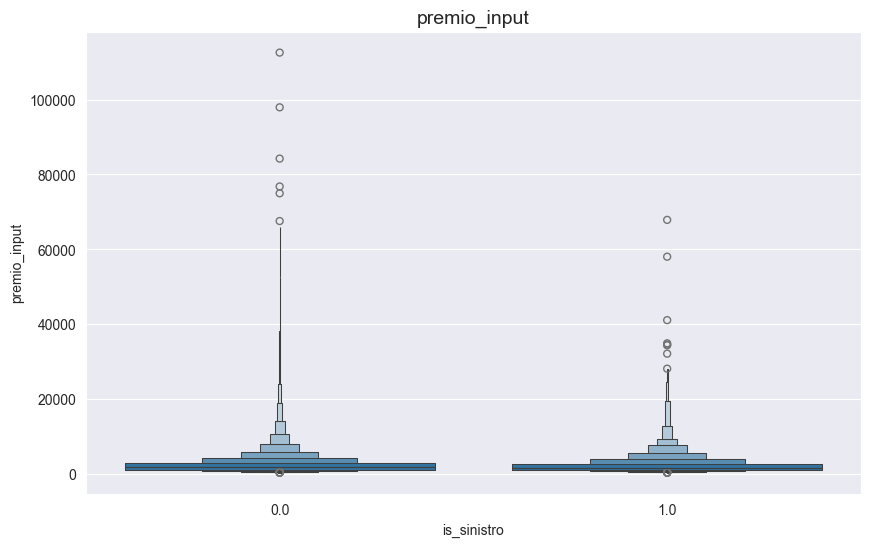

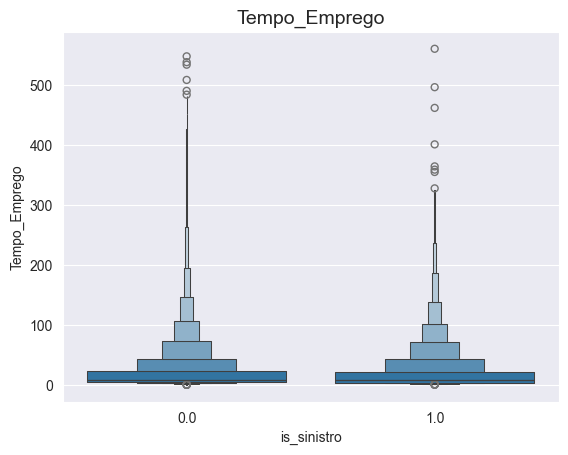

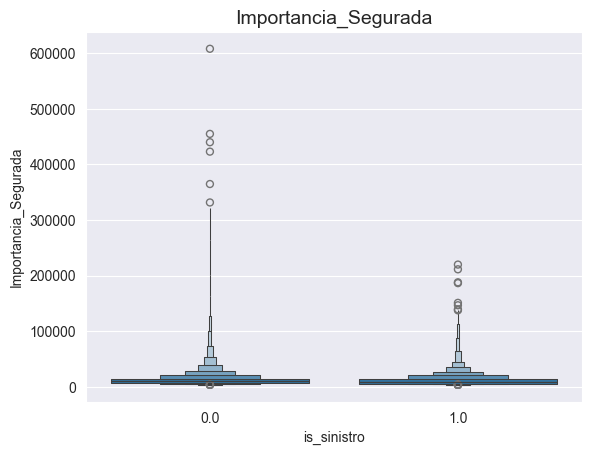

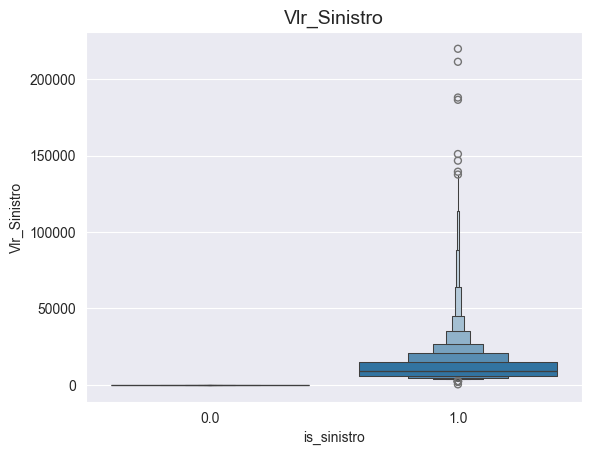

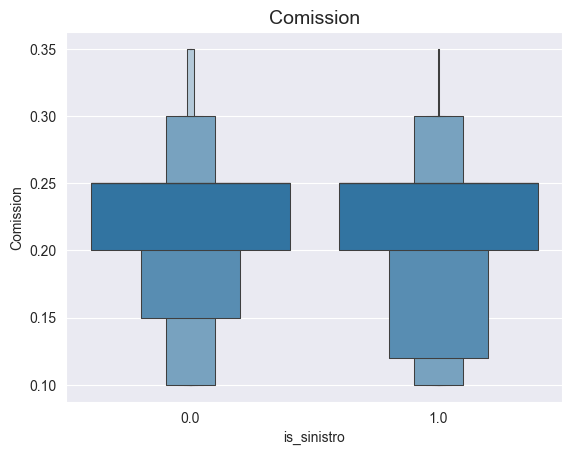

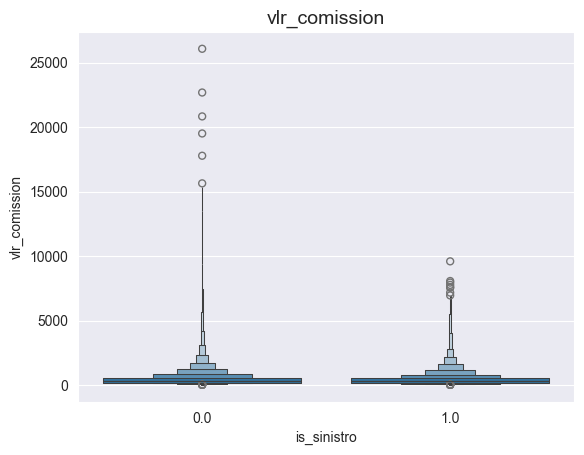

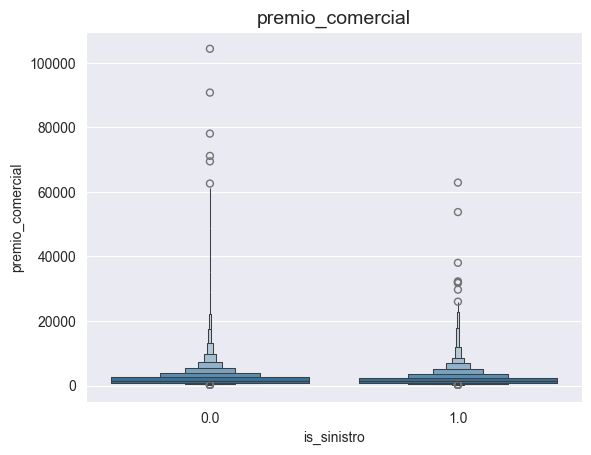

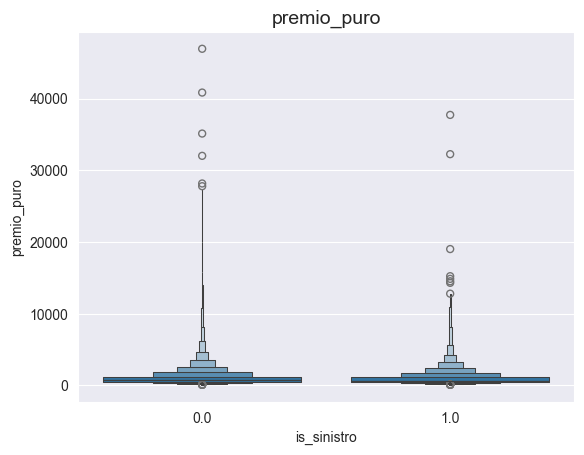

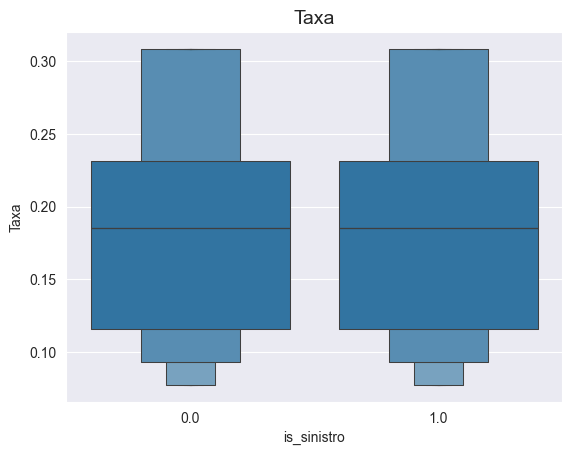

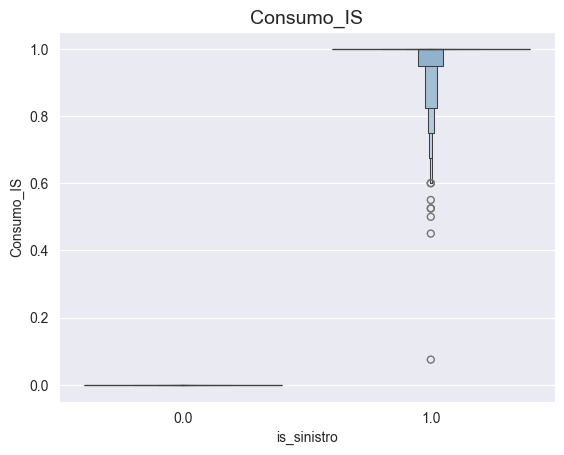

In [301]:
lst_features = ['premio_input', 'Tempo_Emprego', 'Importancia_Segurada', 
'Vlr_Sinistro', 'Comission',  'vlr_comission', 'premio_comercial', 'premio_puro', 'Taxa', 'Consumo_IS']

plt.figure(figsize=(10, 6))

for Names in lst_features: 
    ax = sns.boxenplot(data=df_risk, x='is_sinistro', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

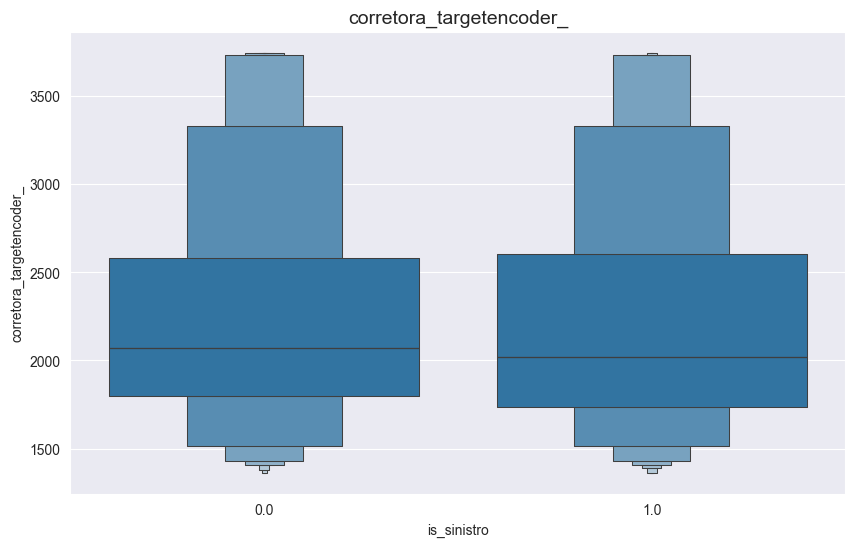

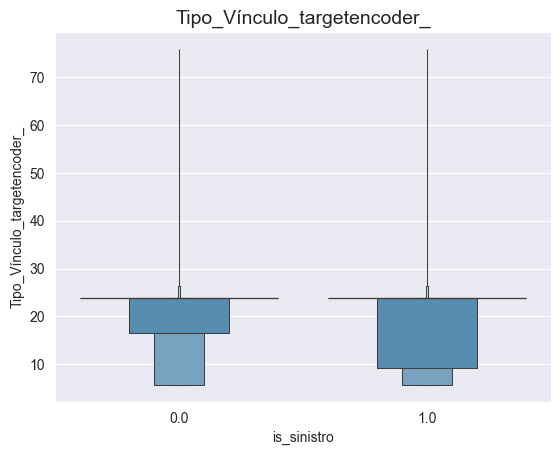

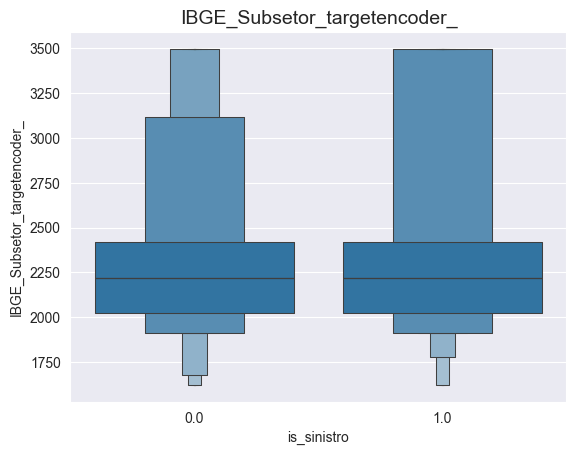

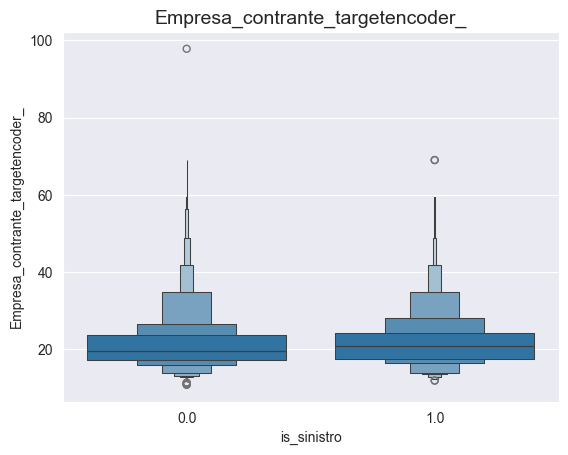

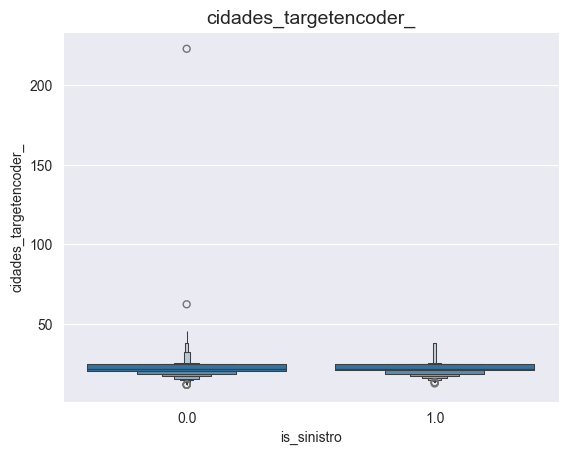

In [302]:
plt.figure(figsize=(10, 6))

for Names in nominal_columns_new : 
    ax = sns.boxenplot(data=df_risk, x='is_sinistro', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

## Selection and MinMaxScaler() from features ##

In [303]:
df_risk.columns, df_risk.shape

(Index(['id', 'Faixa_Hora_Contrat', 'Faixa_Remun_Dezem_(SM)',
        'Escolaridade_após_2005', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
        'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raça_Cor', 'corretora',
        'Sexo_Trabalhador', 'Tamanho_Estabelecimento', 'Tipo_Admissão',
        'Tipo_Defic', 'Tipo_Vínculo', 'IBGE_Subsetor', 'Ind_Trab_Intermitente',
        'Ind_Trab_Parcial', 'premio_input', 'Tempo_Emprego',
        'Importancia_Segurada', 'is_cotacao', 'is_apolice', 'is_sinistro',
        'Vlr_Sinistro', 'Comission', 'Empresa_contrante', 'cidades',
        'premio_comercial', 'vlr_comission', 'premio_puro', 'DA', 'Lucro',
        'Faixa_Etária', 'Taxa', 'corretora_targetencoder_',
        'Tipo_Vínculo_targetencoder_', 'IBGE_Subsetor_targetencoder_',
        'Empresa_contrante_targetencoder_', 'cidades_targetencoder_',
        'Consumo_IS'],
       dtype='object'),
 (54288, 42))

In [332]:
features_selected_risk = df_risk[['id', 
                                'Faixa_Hora_Contrat', 
                                #'Faixa_Remun_Dezem_(SM)',
                                'Escolaridade_após_2005', 'Qtd_Hora_Contr', 'Idade', 
                                'Ind_Simples',
                                'Ind_Portador_Defic', 
                                'Qtd_Dias_Afastamento', 
                                'Raça_Cor', 
                                'Sexo_Trabalhador', 
                                'Tamanho_Estabelecimento', 'Tipo_Admissão',
                                #'Tipo_Defic', 
                                #'Ind_Trab_Intermitente', 
                                #'Ind_Trab_Parcial', 
                                'premio_input', 'Tempo_Emprego',
                                'Importancia_Segurada', 
                                #'Vlr_Sinistro', 
                                'Comission', 
                                #'premio_comercial', 
                                'vlr_comission', 
                                'premio_puro', 
                                'corretora_targetencoder_', 'IBGE_Subsetor_targetencoder_',
                                'Empresa_contrante_targetencoder_', 
                                'cidades_targetencoder_', 
                                'Tipo_Vínculo_targetencoder_',
                                #'Faixa_Etária', 
                                'Taxa', 'is_sinistro'
                                #, 'Consumo_IS'
                                ]]

In [333]:
features_selected_risk = features_selected_risk.set_index(['id'])
features_selected_risk.shape

(54288, 24)

In [334]:
features_selected_risk['is_sinistro'].value_counts(normalize=True)*100

is_sinistro
0.000   86.045
1.000   13.955
Name: proportion, dtype: float64

In [335]:
lst_columns = features_selected_risk.columns.tolist()
lst_columns.remove("is_sinistro")
lst_columns

['Faixa_Hora_Contrat',
 'Escolaridade_após_2005',
 'Qtd_Hora_Contr',
 'Idade',
 'Ind_Simples',
 'Ind_Portador_Defic',
 'Qtd_Dias_Afastamento',
 'Raça_Cor',
 'Sexo_Trabalhador',
 'Tamanho_Estabelecimento',
 'Tipo_Admissão',
 'premio_input',
 'Tempo_Emprego',
 'Importancia_Segurada',
 'Comission',
 'vlr_comission',
 'premio_puro',
 'corretora_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'Empresa_contrante_targetencoder_',
 'cidades_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'Taxa']

In [336]:
#"""
sc = MinMaxScaler()

for  Names in lst_columns:  
    features_selected_risk[Names] = sc.fit_transform(features_selected_risk[[Names]])
#"""    

In [337]:
features_selected_risk.head()

,Faixa_Hora_Contrat,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,premio_input,Tempo_Emprego,Importancia_Segurada,Comission,vlr_comission,premio_puro,corretora_targetencoder_,IBGE_Subsetor_targetencoder_,Empresa_contrante_targetencoder_,cidades_targetencoder_,Tipo_Vínculo_targetencoder_,Taxa,is_sinistro
id,,,,,,,,,,,,,,,,,,,,,,,,
86,0.500,0.800,0.682,0.164,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.032,0.044,0.029,0.000,0.013,0.045,0.596,0.424,0.669,0.123,0.231,0.467,0.000
104,0.500,0.800,0.545,0.233,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.053,0.062,0.094,0.000,0.021,0.072,0.298,0.319,0.669,0.044,0.231,0.111,1.000
119,0.667,0.800,0.909,0.233,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.017,0.026,0.030,0.000,0.007,0.025,0.298,0.319,0.669,0.044,1.000,0.111,1.000
125,0.667,0.800,0.909,0.233,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.055,0.086,0.052,0.000,0.022,0.075,0.596,0.424,0.669,0.123,1.000,0.467,0.000
130,0.667,0.800,0.909,0.205,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.042,0.173,0.102,0.000,0.017,0.058,0.182,1.000,0.669,0.047,1.000,0.000,0.000


## Training Model ##

In [338]:
features_selected_risk.columns

Index(['Faixa_Hora_Contrat', 'Escolaridade_após_2005', 'Qtd_Hora_Contr',
       'Idade', 'Ind_Simples', 'Ind_Portador_Defic', 'Qtd_Dias_Afastamento',
       'Raça_Cor', 'Sexo_Trabalhador', 'Tamanho_Estabelecimento',
       'Tipo_Admissão', 'premio_input', 'Tempo_Emprego',
       'Importancia_Segurada', 'Comission', 'vlr_comission', 'premio_puro',
       'corretora_targetencoder_', 'IBGE_Subsetor_targetencoder_',
       'Empresa_contrante_targetencoder_', 'cidades_targetencoder_',
       'Tipo_Vínculo_targetencoder_', 'Taxa', 'is_sinistro'],
      dtype='object')

In [339]:
interger_teste = ['is_sinistro']   
for  Names in interger_teste:  
    print(features_selected_risk[Names].value_counts())

is_sinistro
0.000    46712
1.000     7576
Name: count, dtype: int64


In [340]:
X = features_selected_risk.drop(columns='is_sinistro')
y = features_selected_risk['is_sinistro']

In [341]:
X.shape, y.shape

((54288, 23), (54288,))

In [342]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=random_, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43430, 23), (10858, 23), (43430,), (10858,))

In [343]:
param = {'objective': 'binary', "is_unbalance": 'true', 'force_col_wise': 'true'}
#clf = lgb.LGBMClassifier(n_jobs=-1, random_state=random_)
#clf = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', n_estimators = 24)
clf = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38, **param)

model = clf.fit(X_train,y_train)

predicted = model.predict(X_test)

y_pred = clf.predict_proba(X_test)[:,1]

y_pred_train = clf.predict_proba(X_train)[:,1]

probabilities = clf.predict_proba(X_test)[:,1]

fp, tp, th = roc_curve(y_test, predicted)

predictions = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, predicted)

[LightGBM] [Info] Number of positive: 6061, number of negative: 37369
[LightGBM] [Info] Total Bins 2117
[LightGBM] [Info] Number of data points in the train set: 43430, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139558 -> initscore=-1.818967
[LightGBM] [Info] Start training from score -1.818967


## Out-put of Model ##

In [344]:
print("accuracy of testing data.: {:.4f}".format(roc_auc_score(y_test, y_pred)))
print("accuracy of training data: {:.4f}".format(roc_auc_score(y_train, y_pred_train)))
print('Training accuracy........: {:.4f}'.format(clf.score(X_train, y_train)))
print('Testing accuracy.........: {:.4f}'.format(clf.score(X_test, y_test)))
print('accuracy score...........: {:.4f}'.format(accuracy_score(y_test, predicted)))
print('precision score..........: {:.4f}'.format(precision_score(y_test, predicted)))
print('recall score.............: {:.4f}'.format(recall_score(y_test, predicted)))
print('f1 score.................: {:.4f}'.format(f1_score(y_test, predicted, average='weighted')))
print('auc......................: {:.4f}'.format(auc(fp, tp)))

accuracy of testing data.: 0.8117
accuracy of training data: 0.8433
Training accuracy........: 0.7701
Testing accuracy.........: 0.7601
accuracy score...........: 0.7601
precision score..........: 0.3299
recall score.............: 0.6977
f1 score.................: 0.7911
auc......................: 0.7339


In [345]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      9343
         1.0       0.33      0.70      0.45      1515

    accuracy                           0.76     10858
   macro avg       0.64      0.73      0.65     10858
weighted avg       0.86      0.76      0.79     10858



In [346]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
#                           Valor Predito
#                        Negativo - Positivo
# Valor Atual - Negativo [   TN   -   FP   ]
# Valor Atual - Positivo [   FN   -   TP   ]

[[7196 2147]
 [ 458 1057]]


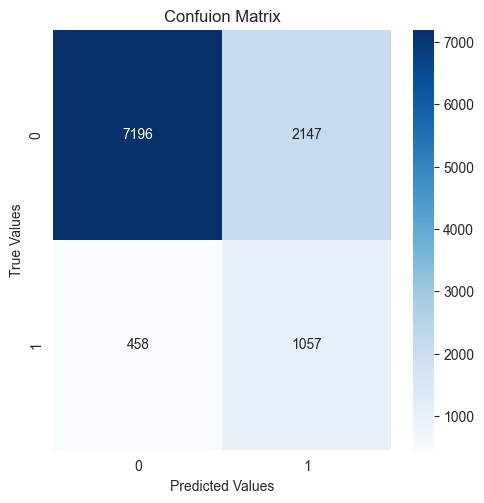

In [347]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Area under curve :  0.8117378429483749 



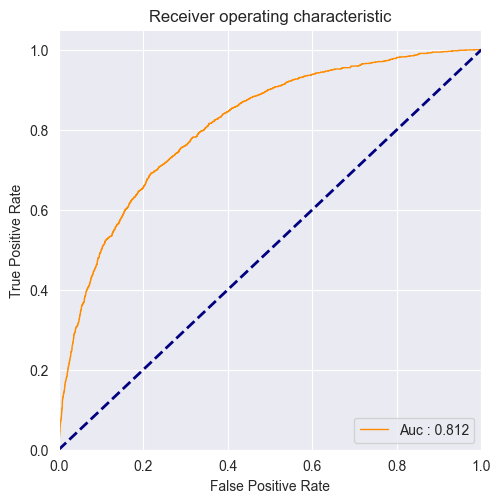

In [348]:
#roc_auc_score
model_roc_auc = roc_auc_score(y_test, probabilities)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test ,probabilities)

plt.figure(figsize=(12,12))
plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

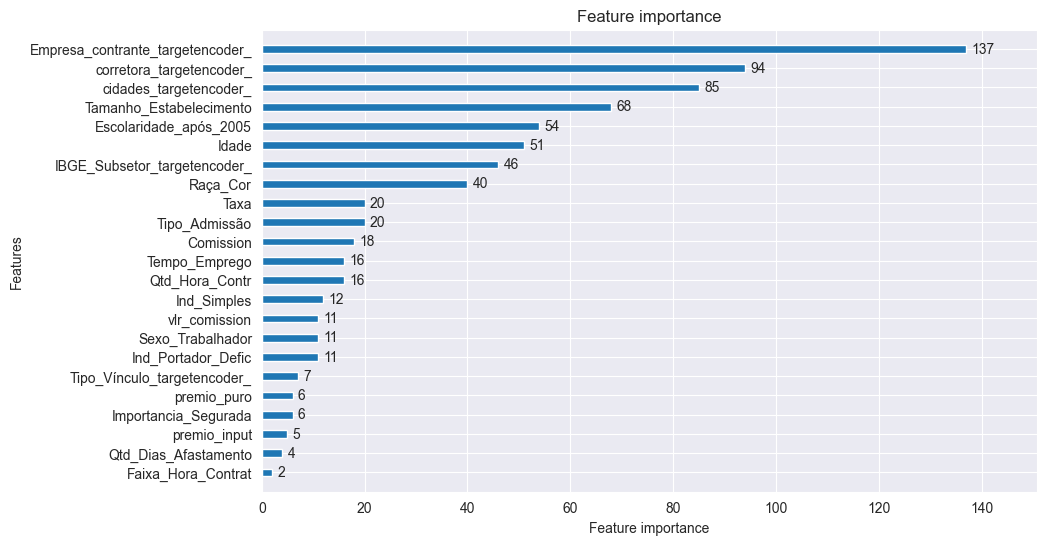

In [349]:
lgb.plot_importance(clf, height = 0.4, 
                         max_num_features = 30, 
                         figsize = (10,6))
plt.show()

In [350]:
coefficients = pd.DataFrame(clf.feature_importances_)
column_df = pd.DataFrame(X.columns)
coef_sumry = (pd.merge(coefficients, column_df, left_index= True, right_index=True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
coef_sumry = coef_sumry[["features", "coefficients"]]
coef_sumry

,features,coefficients
19,Empresa_contrante_targetencoder_,137
17,corretora_targetencoder_,94
20,cidades_targetencoder_,85
9,Tamanho_Estabelecimento,68
1,Escolaridade_após_2005,54
3,Idade,51
18,IBGE_Subsetor_targetencoder_,46
7,Raça_Cor,40
22,Taxa,20
10,Tipo_Admissão,20


In [351]:
features_importances = pd.DataFrame(columns=['feature_name','feature_importance'])
features_importances['feature_name'] = clf.feature_name_
features_importances['feature_importance'] = clf.feature_importances_
features_importances.sort_values('feature_importance', ascending=False)

,feature_name,feature_importance
19,Empresa_contrante_targetencoder_,137
17,corretora_targetencoder_,94
20,cidades_targetencoder_,85
9,Tamanho_Estabelecimento,68
1,Escolaridade_após_2005,54
3,Idade,51
18,IBGE_Subsetor_targetencoder_,46
7,Raça_Cor,40
22,Taxa,20
10,Tipo_Admissão,20


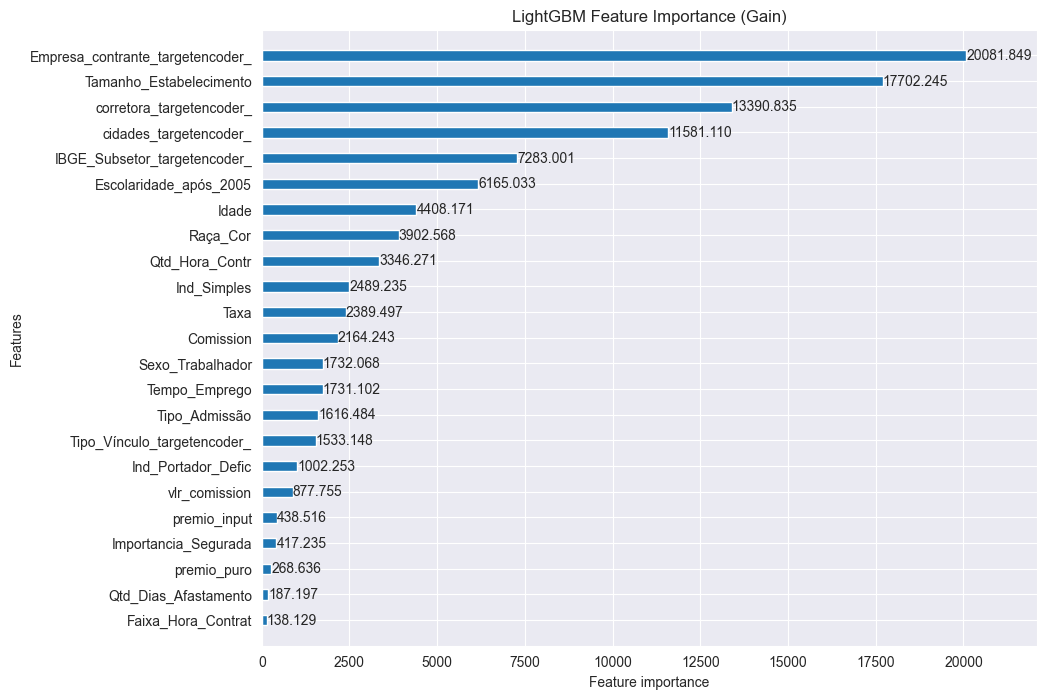

In [352]:
lgb.plot_importance(clf, height = 0.4, importance_type="gain",
                         max_num_features = 30, title="LightGBM Feature Importance (Gain)",
                         figsize = (10, 8))
plt.show()

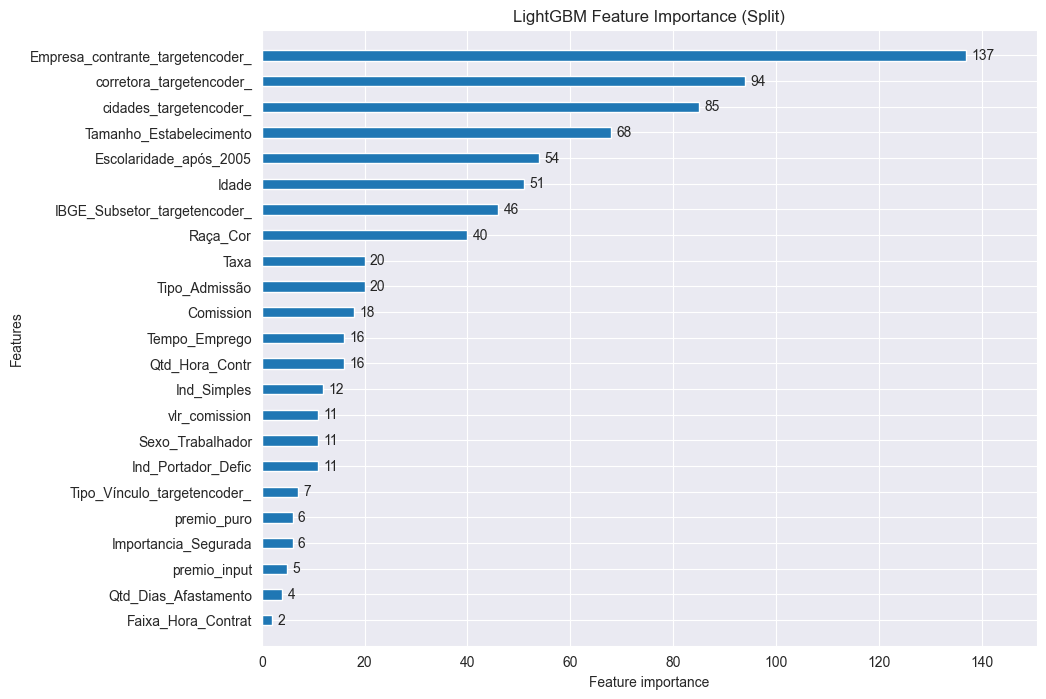

In [353]:
lgb.plot_importance(clf, height = 0.4, importance_type="split",
                         max_num_features = 30, title="LightGBM Feature Importance (Split)",
                         figsize = (10, 8))
plt.show()

## Feature Importance Using LOFO ##

In [354]:
sample_df = features_selected_risk.sample(frac=0.03, random_state=0)
sample_df.sort_values("is_sinistro", inplace=True) # Sort by time for time split validation
sample_df.shape

(1629, 24)

In [355]:
cv = KFold(n_splits=4, shuffle=False, random_state=None)
dataset = Dataset(df=sample_df, target="is_sinistro", features=[col for col in sample_df.columns if col != "is_sinistro"])

In [356]:
#lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc")
lofo_imp = LOFOImportance(dataset, model=clf, scoring="roc_auc")

In [ ]:
warnings.filterwarnings('ignore')
importance_df = lofo_imp.get_importance()

In [358]:
importance_df.head()

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
0,Idade,0.023,0.022,0.051,0.038,0.007,-0.003
18,cidades_targetencoder_,0.021,0.033,-0.004,0.045,0.060,-0.018
21,Sexo_Trabalhador,0.018,0.008,0.009,0.017,0.031,0.015
4,Tamanho_Estabelecimento,0.014,0.023,0.027,0.042,0.004,-0.018
7,Tipo_Vínculo_targetencoder_,0.009,0.011,0.024,0.009,0.011,-0.006


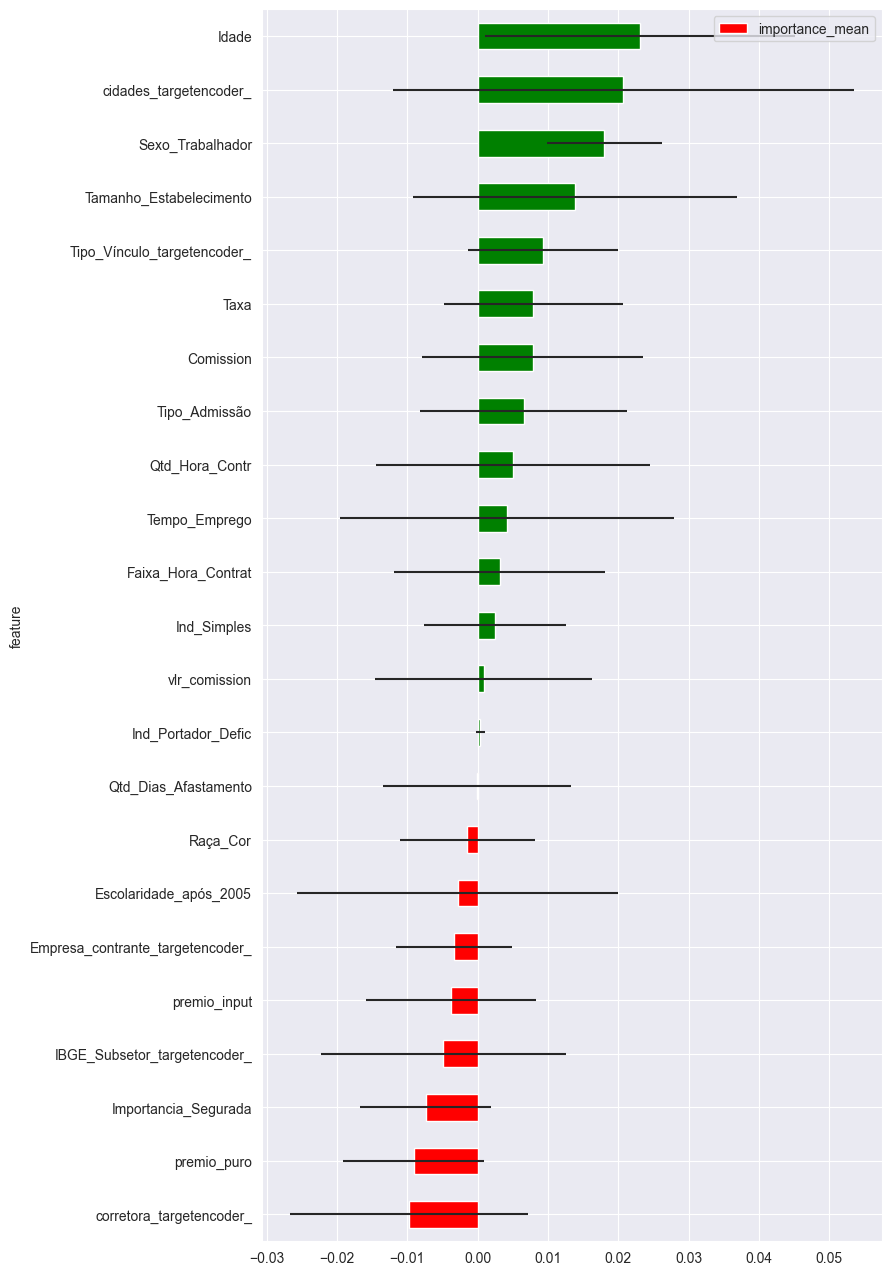

In [359]:
plot_importance(importance_df, figsize=(8,16))

## LightGBM & tuning with optuna ##

In [361]:
import optuna
import warnings
warnings.filterwarnings('ignore')

In [362]:
study = optuna.create_study(direction="maximize")

[I 2024-06-17 18:39:41,363] A new study created in memory with name: no-name-18f3dace-ed9e-4461-ab60-0f6c7823dca4


In [363]:
def objective(trial):
  # Determine the hyperperatemers and their value ranges
  learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
  num_leaves = trial.suggest_int("num_leaves", 2, 256)
  max_depth = trial.suggest_int("max_depth", -1, 50)
  min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
  subsample = trial.suggest_float("subsample", 0.5, 1.0)
  colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
  n_estimators = trial.suggest_int("n_estimators", 100, 1000)
  
  # Create and train the model
  model = lgb.LGBMClassifier(
  learning_rate=learning_rate,
  num_leaves=num_leaves,
  max_depth=max_depth,
  min_child_samples=min_child_samples,
  subsample=subsample,
  colsample_bytree=colsample_bytree,
  n_estimators=n_estimators,
  random_state=42
  )
  model.fit(X_train, y_train)
  
  # Evaluate model and return the metric
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [ ]:
study.optimize(objective, n_trials=20, show_progress_bar=False)
#study.optimize(objective, n_trials=100)
print("Best trial:")
print(" Value: {}".format(study.best_trial.value))
print(" Params: {}".format(study.best_trial.params))

In [365]:
optuna.visualization.plot_optimization_history(study)

In [366]:
optuna.visualization.plot_slice(study)

In [367]:
optuna.visualization.plot_param_importances(study)

In [368]:
print(study.best_params)

{'learning_rate': 0.032954588483561184, 'num_leaves': 236, 'max_depth': 20, 'min_child_samples': 26, 'subsample': 0.7292172665213937, 'colsample_bytree': 0.9170932016138895, 'n_estimators': 951}


In [369]:
best_params = study.best_params
best_params

{'learning_rate': 0.032954588483561184,
 'num_leaves': 236,
 'max_depth': 20,
 'min_child_samples': 26,
 'subsample': 0.7292172665213937,
 'colsample_bytree': 0.9170932016138895,
 'n_estimators': 951}

In [370]:
# Classification error
print(study.best_value)
# Or expressed as accuracy
print(1.0-study.best_value)

0.9022840302081414
0.09771596979185859


In [391]:
dtrain = lgb.Dataset(X, label=y) 

In [392]:
lgbfit = lgb.train(best_params, dtrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2163
[LightGBM] [Info] Number of data points in the train set: 54288, number of used features: 23
[LightGBM] [Info] Start training from score 0.139552
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [393]:
X_test.head()

,Faixa_Hora_Contrat,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Sexo_Trabalhador,Tamanho_Estabelecimento,Tipo_Admissão,premio_input,Tempo_Emprego,Importancia_Segurada,Comission,vlr_comission,premio_puro,corretora_targetencoder_,IBGE_Subsetor_targetencoder_,Empresa_contrante_targetencoder_,cidades_targetencoder_,Tipo_Vínculo_targetencoder_,Taxa
id,,,,,,,,,,,,,,,,,,,,,,,
451277,0.833,0.400,1.000,0.356,0.000,0.000,0.000,0.667,0.000,0.111,0.500,0.009,0.006,0.003,0.400,0.008,0.011,0.427,0.213,0.057,0.025,0.258,0.667
125446,0.833,0.800,1.000,0.164,0.000,0.000,0.000,0.667,0.000,0.667,0.333,0.002,0.003,0.004,0.600,0.003,0.002,0.044,0.318,0.103,0.061,0.000,0.000
561052,0.833,0.400,1.000,0.356,1.000,0.000,0.000,0.333,0.000,0.333,0.000,0.022,0.024,0.013,0.600,0.023,0.022,0.271,0.153,0.091,0.061,0.258,0.667
517363,0.833,0.400,1.000,0.301,0.000,0.000,0.000,0.667,0.000,0.889,0.333,0.032,0.012,0.022,0.400,0.026,0.036,0.427,0.213,0.070,0.052,0.258,0.667
158756,0.500,0.600,0.682,0.151,0.000,0.000,0.000,0.667,1.000,1.000,0.000,0.016,0.073,0.012,0.000,0.006,0.022,0.302,0.318,0.153,0.044,0.258,0.467


In [385]:
X_test.columns, X_test.shape

(Index(['Faixa_Hora_Contrat', 'Escolaridade_após_2005', 'Qtd_Hora_Contr',
        'Idade', 'Ind_Simples', 'Ind_Portador_Defic', 'Qtd_Dias_Afastamento',
        'Raça_Cor', 'Sexo_Trabalhador', 'Tamanho_Estabelecimento',
        'Tipo_Admissão', 'premio_input', 'Tempo_Emprego',
        'Importancia_Segurada', 'Comission', 'vlr_comission', 'premio_puro',
        'corretora_targetencoder_', 'IBGE_Subsetor_targetencoder_',
        'Empresa_contrante_targetencoder_', 'cidades_targetencoder_',
        'Tipo_Vínculo_targetencoder_', 'Taxa'],
       dtype='object'),
 (10858, 23))

In [394]:
y_pred = lgbfit.predict(X_test, num_iteration=lgbfit.best_iteration)

In [395]:
y_pred

array([ 0.00712126,  0.06938165,  0.02276406, ...,  0.05567921,
        0.05275359, -0.01315049])

In [396]:
len(y_pred)

10858

In [397]:
test_final = y_test.copy()
test_final = test_final.reset_index()
test_final['prediction_risk_calibrated'] = y_pred
test_final['Acima_75'] = np.where(test_final['prediction_risk_calibrated'] >= 0.75, 1, 0)
test_final.head()

,id,is_sinistro,prediction_risk_calibrated,Acima_75
0,451277,0.000,0.007,0
1,125446,0.000,0.069,0
2,561052,0.000,0.023,0
3,517363,0.000,0.022,0
4,158756,0.000,0.211,0


In [398]:
df_matrix = test_final[['is_sinistro', 'Acima_75']]
df_True_Positive = df_matrix[(df_matrix['is_sinistro'] == 1) & (df_matrix['Acima_75'] == 1)]
df_True_Negative = df_matrix[(df_matrix['is_sinistro'] == 0) & (df_matrix['Acima_75'] == 0)]
df_False_Positive = df_matrix[(df_matrix['is_sinistro'] == 0) & (df_matrix['Acima_75'] == 1)]
df_False_Negative = df_matrix[(df_matrix['is_sinistro'] == 1) & (df_matrix['Acima_75'] == 0)]

print("True Positive - TP: ", len(df_True_Positive))
print("True Negative - TN: ", len(df_True_Negative))
print("False Positive - FP: ", len(df_False_Positive))
print("False Negative - FN: ", len(df_False_Negative))
print("Accuracy: ", (len(df_True_Positive) + len(df_True_Negative)) / (len(df_True_Positive) + len(df_True_Negative) + len(df_False_Positive) + len(df_False_Negative)))
print("Precision: ", (len(df_True_Positive)) / (len(df_True_Positive) + len(df_False_Positive)))
print("Recall: ", (len(df_True_Positive)) / (len(df_True_Positive) + len(df_False_Negative)))
print("F1 score: ", (len(df_True_Positive) / (len(df_True_Positive) + ((len(df_False_Negative) + len(df_False_Positive)) / 2))))

#                           Valor Predito
#                        Negativo - Positivo
# Valor Atual - Negativo [   TN   -   FP   ] 
# Valor Atual - Positivo [   FN   -   TP   ]

True Positive - TP:  627
True Negative - TN:  9343
False Positive - FP:  0
False Negative - FN:  888
Accuracy:  0.9182169828697735
Precision:  1.0
Recall:  0.41386138613861384
F1 score:  0.5854341736694678
